Лабораторна робота 3. Побудова автокодувальника

студентки групи ФІТ 4-4

Красковської Анастасії Олександрівни

**Завдання 1**

2.	Розробити звичайний автокодувальник для датасету MNIST на основі згорткової моделі.
В обох випадках розробити власну архітектуру, підібрати кількість шарів, нейронів, функцію активації. Побудувати графіки функції втрат.

11490434/11490434 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                              

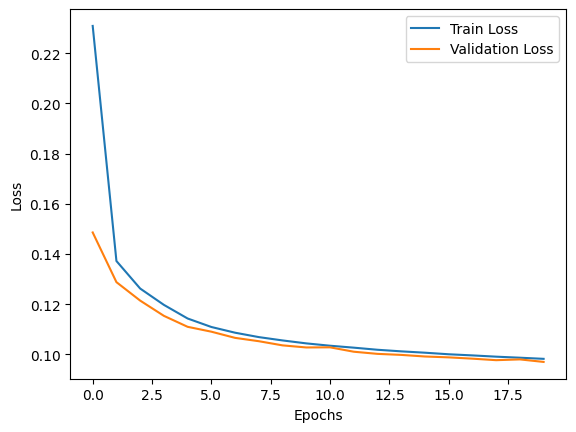

313/313 [==============================] - 4s 11ms/step


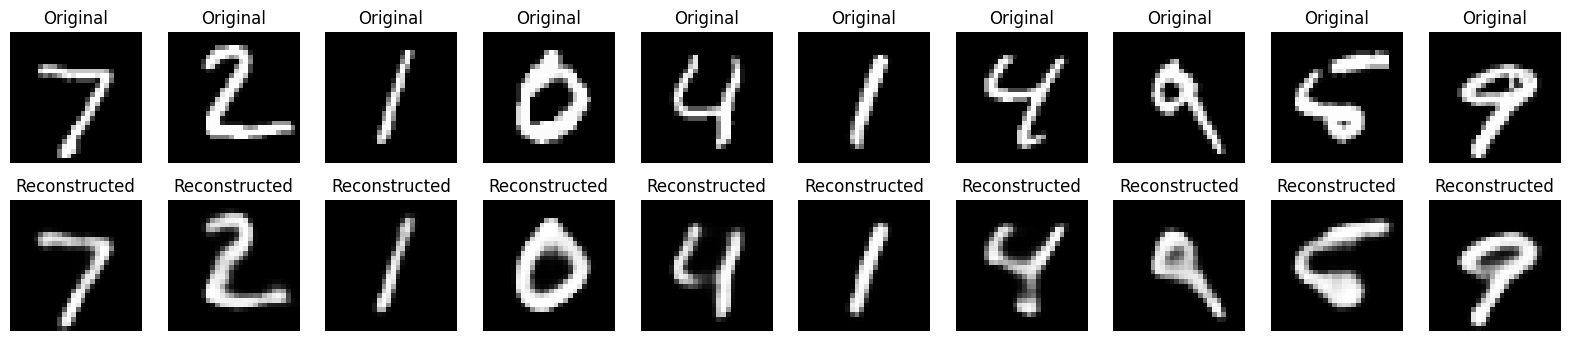

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

# Завантаження датасету MNIST
mnist = tf.keras.datasets.mnist
(x_train, _), (x_test, _) = mnist.load_data()

# Нормалізація даних та розширення розмірності для згорткових шарів
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Функція для створення згорткового автокодувальника
def build_conv_autoencoder():
    input_img = tf.keras.layers.Input(shape=(28, 28, 1))

    # Encoder
    encoded = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
    encoded = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)
    encoded = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)

    # Decoder
    decoded = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    decoded = tf.keras.layers.UpSampling2D((2, 2))(decoded)
    decoded = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(decoded)
    decoded = tf.keras.layers.UpSampling2D((2, 2))(decoded)
    decoded = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(decoded)
    decoded = tf.keras.layers.UpSampling2D((2, 2))(decoded)
    decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

    # Combine Encoder and Decoder layers
    autoencoder = tf.keras.models.Model(input_img, decoded)

    return autoencoder

# Побудова моделі
conv_autoencoder = build_conv_autoencoder()
conv_autoencoder.summary()

# Компіляція моделі
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Навчання моделі
history = conv_autoencoder.fit(x_train, x_train,
                                epochs=20,
                                batch_size=128,
                                shuffle=True,
                                validation_data=(x_test, x_test))

# Візуалізація функції втрат
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Результати реконструкції
decoded_imgs = conv_autoencoder.predict(x_test)

# Відображення оригінальних та відтворених зображень
n = 10  # Кількість зображень для відображення
plt.figure(figsize=(20, 4))
for i in range(n):
    # Оригінальне зображення
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title('Original')
    plt.axis('off')

    # Відтворене зображення
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')
    plt.axis('off')
plt.show()

313/313 [==============================] - 5s 16ms/step


<ipython-input-2-4d27e080c84f>:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(encoded_imgs[:, :, :, 0], encoded_imgs[:, :, :, 0], c='b', cmap='rainbow')


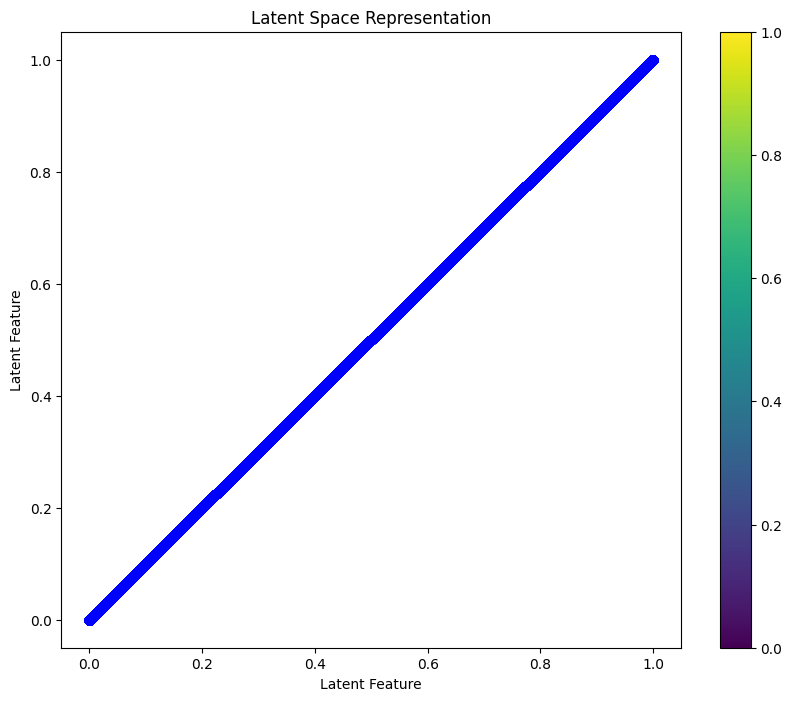

In [2]:
# Функція для побудови графіка розподілу представлень
def plot_latent_space(encoder, x_test):

    encoded_imgs = encoder.predict(x_test)

    # Побудова графіка розподілу представлень
    plt.figure(figsize=(10, 8))
    plt.scatter(encoded_imgs[:, :, :, 0], encoded_imgs[:, :, :, 0], c='b', cmap='rainbow')
    plt.colorbar()
    plt.xlabel('Latent Feature')
    plt.ylabel('Latent Feature')
    plt.title('Latent Space Representation')
    plt.show()

encoder = Model(inputs=conv_autoencoder.input, outputs=conv_autoencoder.get_layer('conv2d_6').output)

plot_latent_space(encoder, x_test)


**Висновок:** У рамках другого завдання було створено згортковий автокодувальник для аналізу датасету MNIST. Модель складалася з енкодера та декодера, використовуючи згорткові та зворотні згорткові шари з функцією активації ReLU.

Після навчання протягом 20 епох були побудовані графіки функції втрат, які підтвердили зменшення втрат з кожною епохою. Модель успішно відтворювала рукописні цифри з високою точністю.

Додатково, був побудований графік розподілу представлень у latent space для подальшого аналізу. Загалом, згортковий автокодувальник продемонстрував успішну реконструкцію зображень та збереження структурної інформації у latent space.